In [1]:
qtconsole

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.animation as anim

In [3]:
plt.style.use('seaborn')

Loading CSV:

In [4]:
names = pd.read_csv('names_nationaldata.csv')

In [18]:
names.sample(10)

,name,sex,number,year
1225513,Elias,F,5,2007
715223,Dewey,M,302,1961
81260,Kolton,M,724,2018
1407486,Chapin,M,7,2006
1192240,Brexton,M,51,2012
321946,Jerrold,M,122,1964
895748,Hallet,M,6,1923
77715,Marcelline,F,6,2018
323940,Conor,M,10,1964
1260370,Rogina,F,5,1955


In [7]:
print(names.year.min())
print(names.year.max())

1880
2018


# EDA

## Total names listed per year

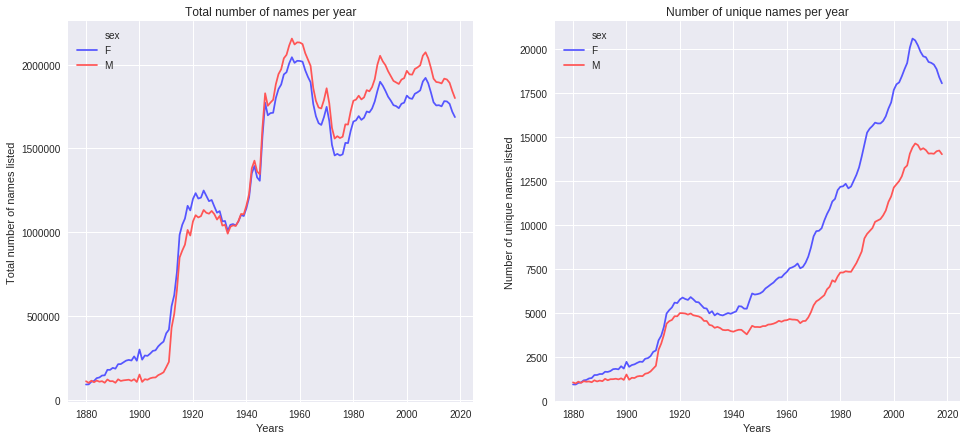

In [111]:
totalnameslistedperyear = names.groupby(['year', 'sex'])[['number']].sum().reset_index()
countnameslistedperyear = names.groupby(['year', 'sex'])[['name']].count().reset_index()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = sns.lineplot('year', 'number', hue='sex', data=totalnameslistedperyear, ax=ax1, palette='seismic')
_ = sns.lineplot('year', 'name', hue='sex', data=countnameslistedperyear, ax=ax2, palette='seismic')
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names listed'), ax2.set_ylabel('Number of unique names listed')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Number of unique names per year')

The number of names listed each year has increased. So there must be new names coming into the list.

## Trends in names

KeyboardInterrupt: 

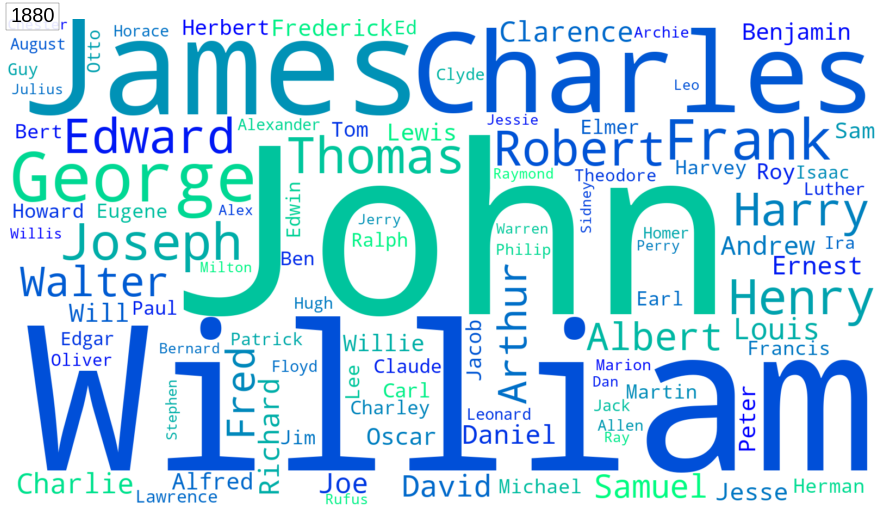

In [90]:
# Making wordclouds of top 100 names per year

colormaps = {'M':'winter', 'F':'spring'}
figwidth = 16 #inches
figheight = 9 #inches
yearsrange = range(names.year.min(), names.year.max()+1)

# creating figure to be saved
fig = plt.figure(figsize=(figwidth,figheight))
_ = plt.axis("off")

for s in ['M', 'F']:
    images = []
    for yr in yearsrange:
        # save a temporary dataframe of names and numbers per sex, per year
        tempM = names[['name', 'number']][np.logical_and(names.sex==s, \
                                           names.year==yr)].sort_values(['number', 'name'], ascending=False)
        # extract the bottom 100 names in popularity
        tempM = tempM.to_numpy()[:100]
        # create wordcloud object
        wordcloud = WordCloud(background_color="white", width=figwidth*100, height=figheight*100, colormap=colormaps[s])
        wordcloud = wordcloud.generate_from_frequencies(dict(tempM))
        plt_im = plt.imshow(wordcloud, interpolation="bilinear")
        plt_txt = plt.text(5, 5, str(yr), color='black', fontsize=20, bbox=dict(facecolor='white', alpha=0.9))
        images.append([plt_im, plt_txt])
    animation = anim.ArtistAnimation(fig, images)
    animation.save('top100{}names_{}x{}.gif'.format(s,figwidth,figheight), writer='imagemagick', fps=4)
    animation.save('top100{}names_{}x{}.mp4'.format(s,figwidth,figheight), writer='ffmpeg', fps=4)

## Plotting name history

In [97]:
# Separating male and female names
namesM = names[names.sex=='M'].reset_index(drop=True)
namesF = names[names.sex=='F'].reset_index(drop=True)
# Pivot to have names in columns and years as index
namesMperYear = namesM.pivot(index='year', columns='name', values='number')
namesMperYear = namesMperYear.replace(to_replace=np.NaN, value=0)

namesFperYear = namesF.pivot(index='year', columns='name', values='number')
namesFperYear = namesFperYear.replace(to_replace=np.NaN, value=0)

namesMperYearPercent = namesMperYear.divide(namesMperYear.apply(np.sum, axis=1) / 100, axis=0)
namesFperYearPercent = namesFperYear.divide(namesFperYear.apply(np.sum, axis=1) / 100, axis=0)

In [95]:
namesMperYear.tail()

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2014,16.0,0.0,0.0,19.0,8.0,18.0,239.0,0.0,25.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2015,15.0,0.0,0.0,22.0,10.0,15.0,297.0,0.0,31.0,5.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,7.0,0.0,0.0
2016,9.0,5.0,5.0,18.0,0.0,11.0,196.0,0.0,28.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,11.0,0.0,0.0,18.0,8.0,15.0,241.0,7.0,31.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,7.0,6.0,5.0,19.0,0.0,10.0,171.0,0.0,25.0,8.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0


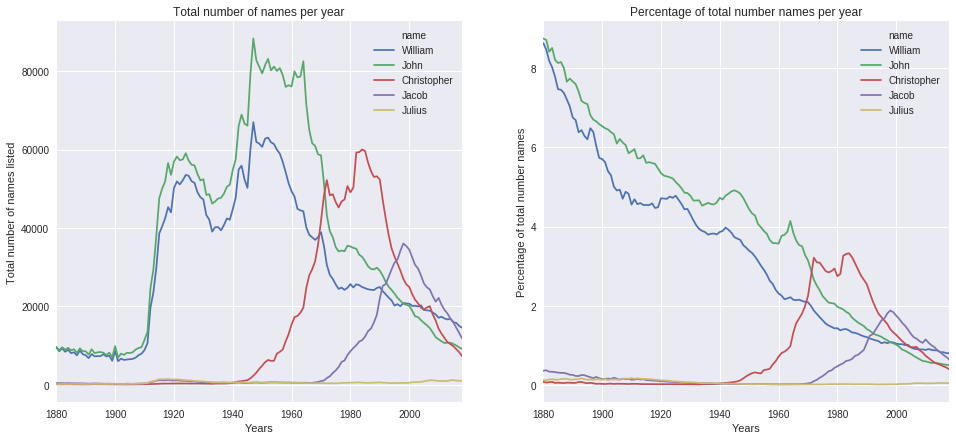

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesMperYear[['William', 'John', 'Christopher', 'Jacob', 'Julius']].plot(ax=ax1)
_ = namesMperYearPercent[['William', 'John', 'Christopher', 'Jacob', 'Julius']].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names listed'), ax2.set_ylabel('Percentage of total number names')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Percentage of total number names per year')

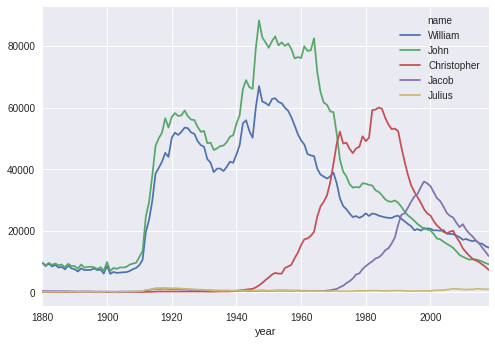

In [12]:
namesMperYear[['William', 'John', 'Christopher', 'Jacob', 'Julius']].plot()

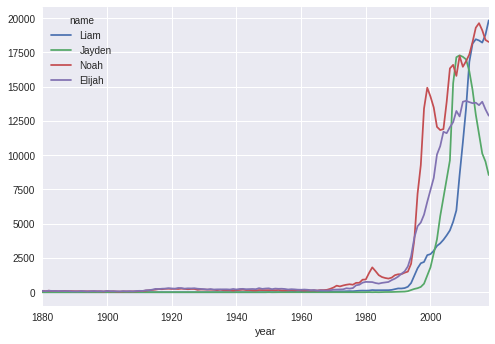

In [160]:
namesMperYear[['Liam', 'Jayden', 'Noah', 'Elijah']].plot()

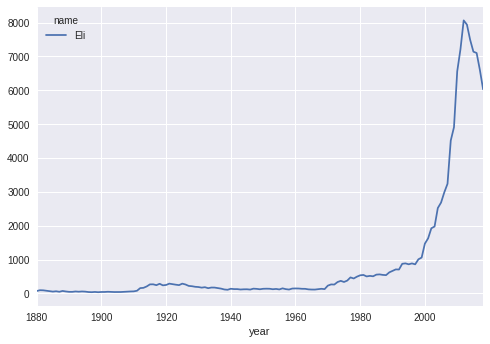

In [226]:
namesMperYear[['Eli']].plot()

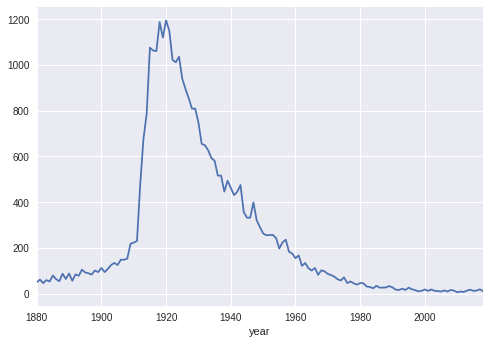

In [110]:
namesMperYear['Orville'].plot()

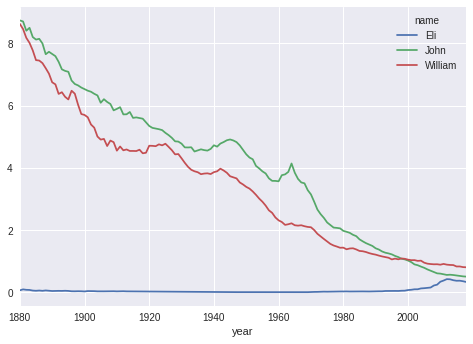

In [98]:
namesMperYearPercent[['Eli', 'John', 'William']].plot()

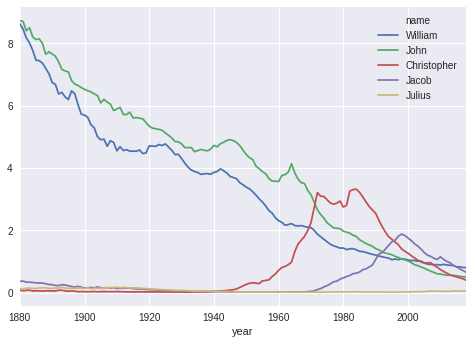

In [233]:
namesMperYearPercent[['William', 'John', 'Christopher', 'Jacob', 'Julius']].plot()

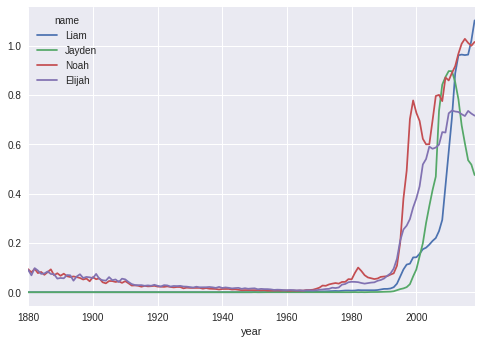

In [234]:
namesMperYearPercent[['Liam', 'Jayden', 'Noah', 'Elijah']].plot()

### Making a mask looking for increasingly/decreasingly popular names (FIX THIS!)

In [ ]:
pattern = np.zeros(namesMperYear.shape[0]) 
pattern[:namesMperYear.shape[0]//3] = -1
pattern[-namesMperYear.shape[0]//3:] = 1

plt.plot(pattern)

toreduce = namesMperYearPercent.copy().to_numpy()
toreduce *= pattern.reshape(pattern.shape[0],1).repeat(namesMperYear.shape[1],axis=1)
toreduce = toreduce.sum(0)
toreduce.shape

plt.plot(toreduce)

namesindices = toreduce.argsort()[::-1][:10]
list(namesMperYear.columns[namesindices])

namesMperYear[list(namesMperYear.columns[namesindices])].plot()

Not gonna use this:

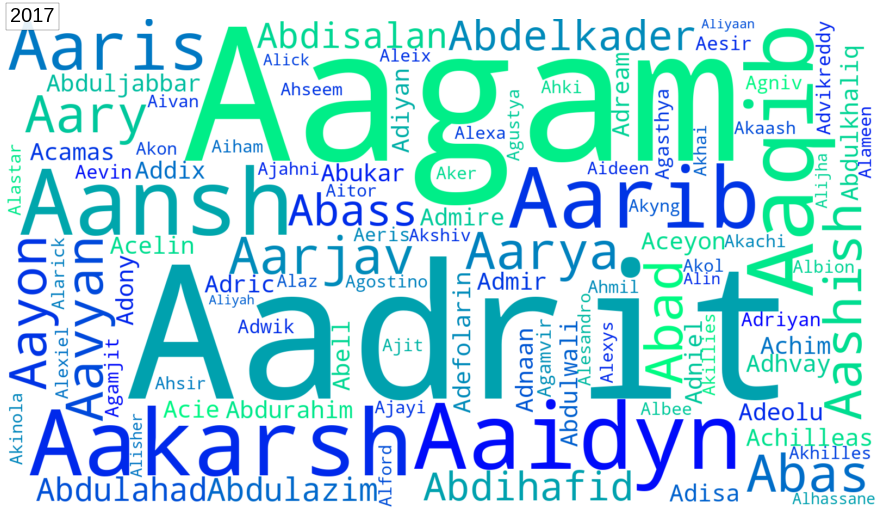

In [236]:
# Making wordclouds of bottom 100 names per year

colormaps = {'M':'winter', 'F':'spring'}
figwidth = 16 #inches
figheight = 9 #inches
yearsrange = range(names.year.min(), names.year.max())

# creating figure to be saved
fig = plt.figure(figsize=(figwidth,figheight))
_ = plt.axis("off")

for s in ['M', 'F']:
    images = []
    for yr in yearsrange:
        # save a temporary dataframe of names and numbers per sex, per year
        tempM = names[['name', 'number']][np.logical_and(names.sex==s, names.year==yr)].sort_values(['number','name'])
        # extract the bottom 100 names in popularity
        tempM = tempM.to_numpy()[:100]
        # create wordcloud object
        wordcloud = WordCloud(background_color="white", width=figwidth*100, height=figheight*100, colormap=colormaps[s])
        wordcloud = wordcloud.generate_from_frequencies(dict(tempM))
        plt_im = plt.imshow(wordcloud, interpolation="bilinear")
        plt_txt = plt.text(5, 5, str(yr), color='black', fontsize=20, bbox=dict(facecolor='white', alpha=0.9))
        images.append([plt_im, plt_txt])
    animation = anim.ArtistAnimation(fig, images)
    animation.save('bottom100{}names.gif'.format(s), writer='imagemagick', fps=4)
    animation.save('bottom100{}names.mp4'.format(s), writer='ffmpeg', fps=4)

In [251]:
names[['name', 'number']][np.logical_and(names.sex=='M', names.year==1890)].sample(10)
#.sort_values(['number','name'])

,name,number
1522453,Elgie,5
1522182,Hamilton,8
1521618,Don,61
1522209,Sampson,8
1522082,Collie,9
1522187,Hilliard,8
1522170,Dell,8
1521715,Pedro,32
1521859,Milo,17
1522039,Benedict,10
